In [2]:
!conda install -y tensorflow

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/mark/anaconda3/envs/dsfs

  added / updated specs:
    - tensorflow


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2024.8.30~ --> pkgs/main/osx-arm64::certifi-2024.8.30-py311hca03da5_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done


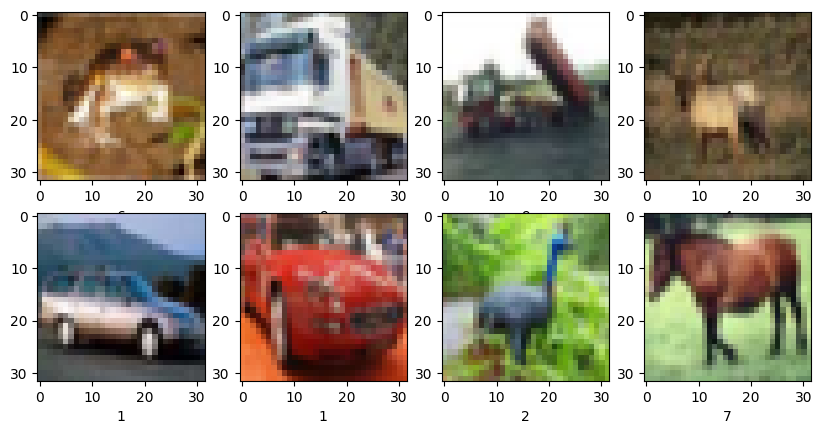

(50000, 32, 32, 3)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# https://www.tensorflow.org/datasets/catalog/cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 for augmentation
# Gives a value between 0.00392156862745098 and 0.996078431372549
x_train = x_train.astype('float32') / 255.0
x_test =  x_test.astype('float32') / 255.0 

plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i][0])
plt.show()

x_train.shape

In [31]:
# Creae a sample image

from PIL import Image, ImageDraw

# Blank white image with a red square in it
image = Image.new('RGB', (224, 224), (255, 255, 255))
draw = ImageDraw.Draw(image)
draw.rectangle([50, 50, 174, 174], fill="red")

image.save('sample.jpg')

In [32]:
# Load the image and convert it to a numpy array
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

# Load the image
image = Image.open('sample.jpg')

# Convert the image to an array
image_array = img_to_array(image)
print(image_array.shape)

# Add a new dimension (batch dimension)
x = np.expand_dims(image_array, axis=0)

# Check the shape
print(x.shape)


(224, 224, 3)
(1, 224, 224, 3)


## Basic Augmentation

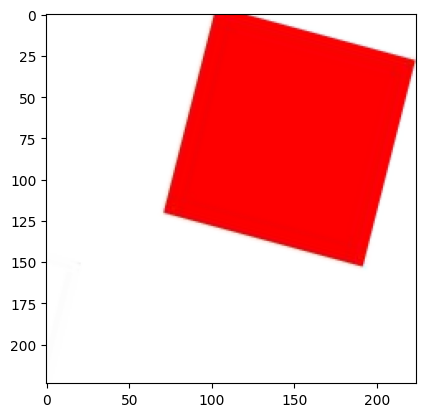

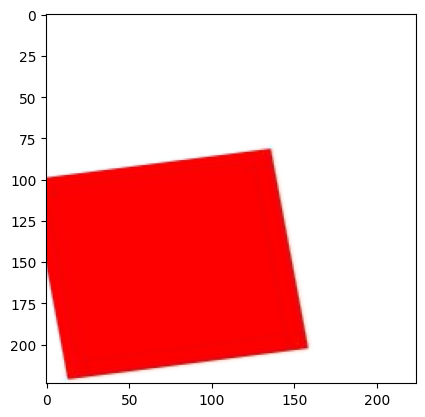

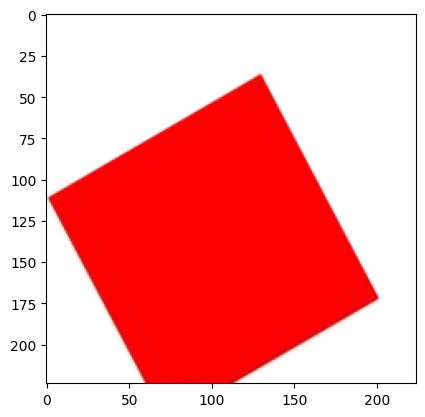

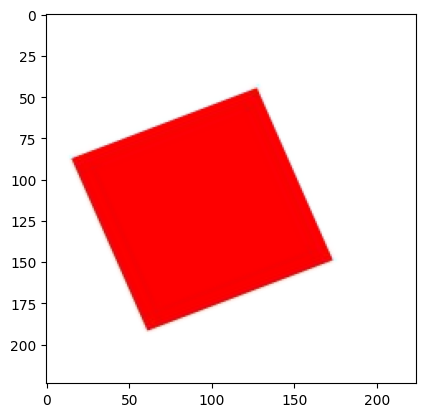

In [33]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Generate batches augmented images
i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Same code but with Feature and Sample-wise normalization

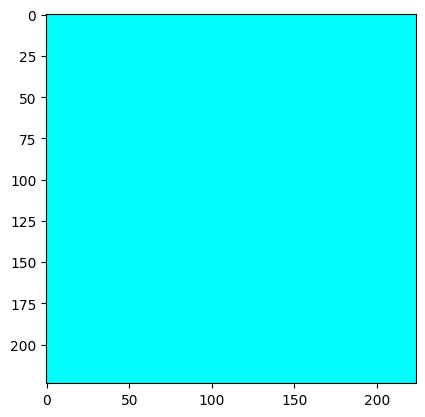

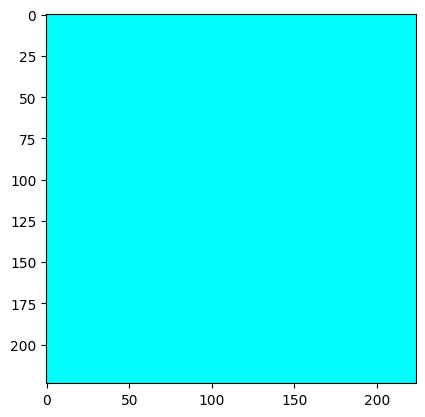

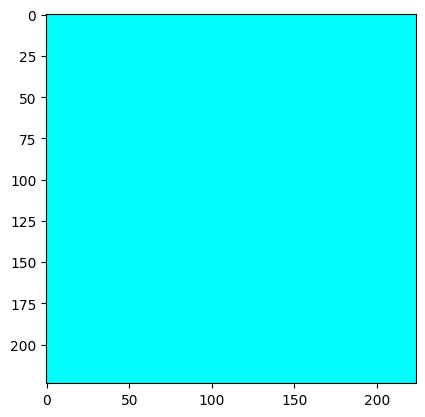

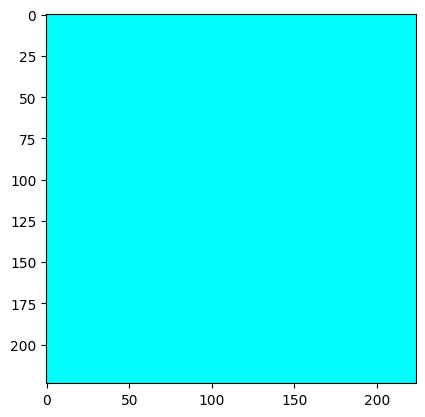

In [38]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True)


# Fit the data generator with the sample (normally done on the training set)
datagen.fit(x)

# Generate batches augmented images
i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Adding noise with a custom augmentation function

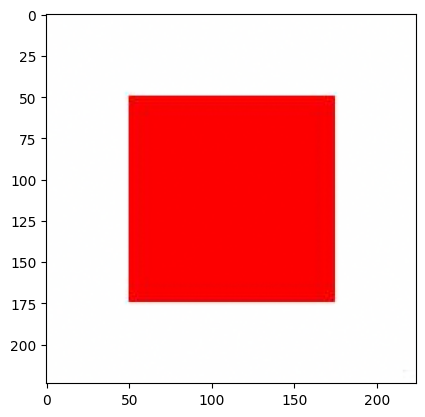

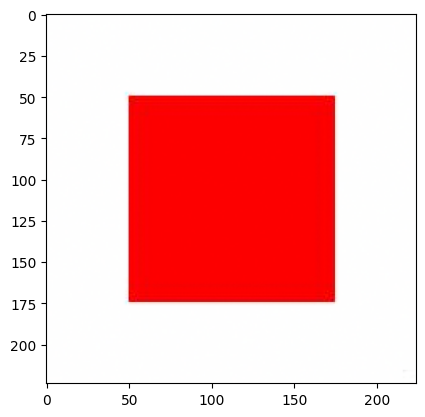

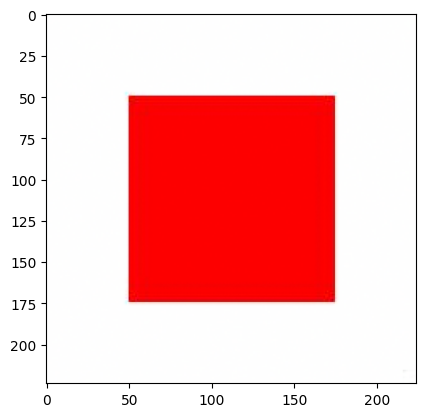

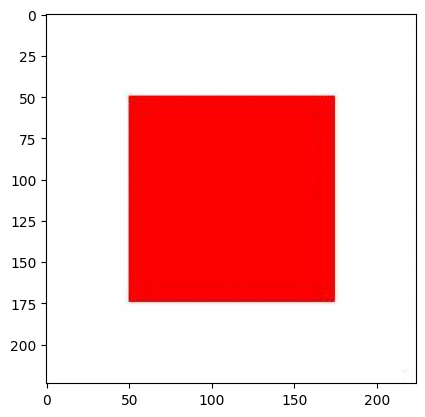

In [43]:
def add_noise(image):
    noise = np.random.normal(0, 0.1,image.shape)
    return image + noise

datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=add_noise)

# Generate batches augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break
plt.show()

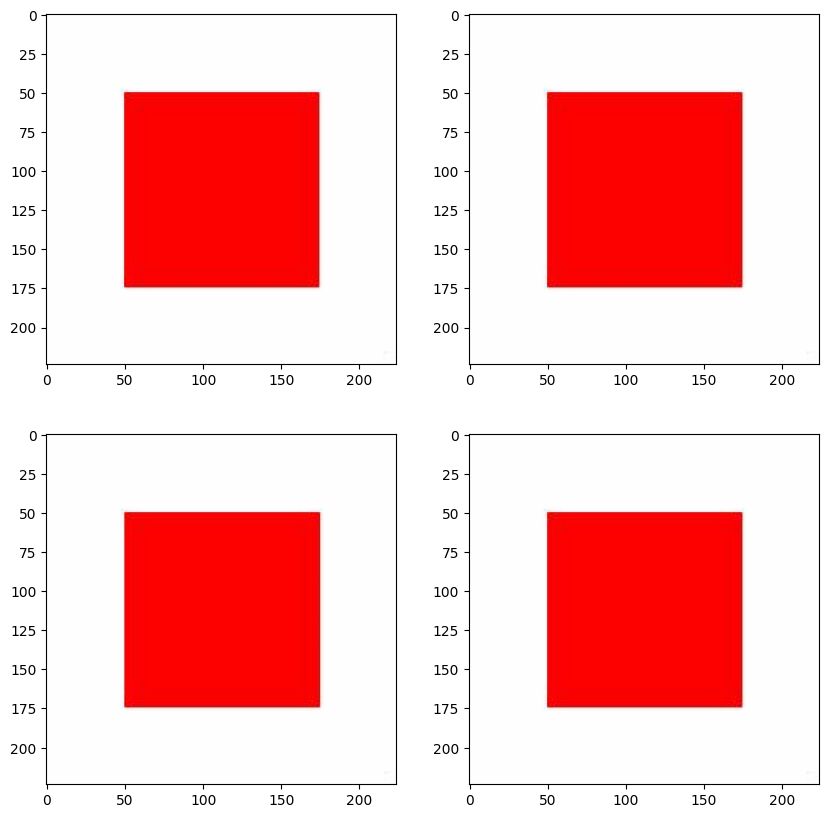

In [44]:
#visualize 
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:
        break
    plt.subplot(2, 2, i + 1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
plt.show()